In [3]:
from utils import Song
import librosa
import numpy as np
import matplotlib.pyplot as plt

In [9]:
beatles = Song('beatles.wav')
S = np.abs(librosa.stft(beatles.x, n_fft=4096))**2
chroma = librosa.feature.chroma_stft(S=S, sr=beatles.sample_rate)

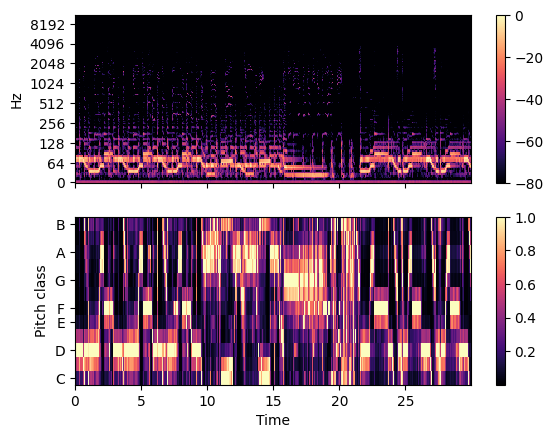

In [10]:
fig, ax = plt.subplots(nrows=2, sharex=True)
img = librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                               y_axis='log', x_axis='time', ax=ax[0])
fig.colorbar(img, ax=[ax[0]])
ax[0].label_outer()
img = librosa.display.specshow(chroma, y_axis='chroma', x_axis='time', ax=ax[1])
fig.colorbar(img, ax=[ax[1]])